In [1]:
## Importing Packages/Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Importing File
df=pd.read_csv('S:\ML\Datasets\Clustering\Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Checking Dataset Information

In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [6]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [8]:
df.country.value_counts()

Slovak Republic        1
Georgia                1
United States          1
Antigua and Barbuda    1
Benin                  1
                      ..
Guatemala              1
Netherlands            1
Kuwait                 1
Seychelles             1
South Africa           1
Name: country, Length: 167, dtype: int64

As there are 167 rows and each row contains different country.Lets drop country column as it is of no use.

In [9]:
df=df.drop(columns='country')
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Exploratory Data Analysis

In [10]:
## Checking Missing values
df.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No missing values found.

In [11]:
## Checking Duplicate values
df.duplicated().sum()

0

<AxesSubplot:>

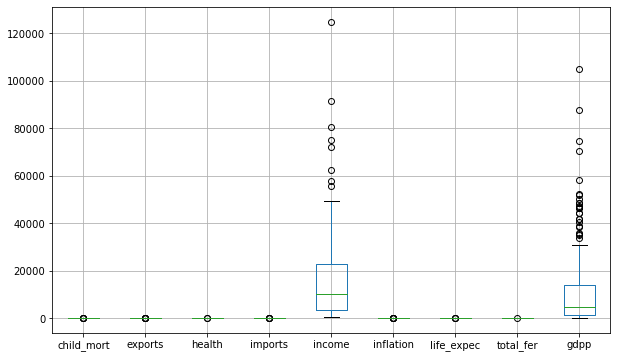

In [12]:
## Checking Outliers
df.boxplot(figsize=(10,6))

In [13]:
## Clipping Outliers
def clipValues(df,lower,upper):
    for col in df.columns:
        l=df[col].quantile(lower) 
        u=df[col].quantile(upper)
        df[col]=df[col].clip(l,u)
    return df

In [14]:
df1=df
df1=clipValues(df1,0.05,0.95)
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,12.12,7.58,44.90,1610,9.44,56.20,5.820,553.0
1,16.6,28.00,6.55,48.60,9930,4.49,76.30,1.650,4090.0
2,27.3,38.40,4.17,31.40,12900,16.10,76.50,2.890,4460.0
3,116.0,62.30,2.85,42.90,5900,20.87,60.10,5.861,3530.0
4,10.3,45.50,6.03,58.90,19100,1.44,76.80,2.130,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.60,5.25,52.70,2950,2.62,63.00,3.500,2970.0
163,17.1,28.50,4.91,18.13,16500,20.87,75.40,2.470,13500.0
164,23.3,72.00,6.84,80.20,4490,12.10,73.10,1.950,1310.0
165,56.3,30.00,5.18,34.40,4480,20.87,67.50,4.670,1310.0


In [15]:
df1.shape

(167, 9)

<AxesSubplot:>

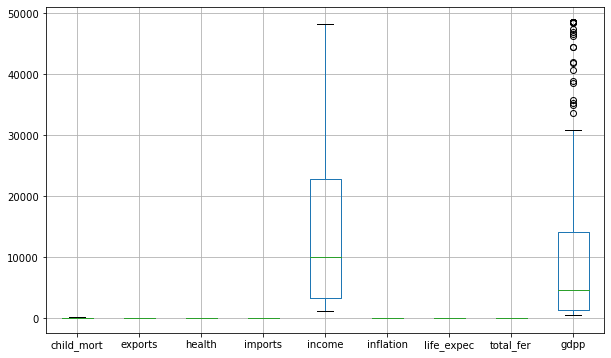

In [16]:
df1.boxplot(figsize=(10,6))

### Applying MinMax Scaler on data 

In [25]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df1=mm.fit_transform(df1)
df1

array([[0.77074818, 0.        , 0.54550632, ..., 0.01639344, 0.99082979,
        0.00180915],
       [0.11675849, 0.23199416, 0.42818089, ..., 0.80093677, 0.05815254,
        0.0752761 ],
       [0.21183579, 0.38392988, 0.15707939, ..., 0.80874317, 0.33549541,
        0.08296136],
       ...,
       [0.17629287, 0.87479912, 0.46121426, ..., 0.67603435, 0.12525162,
        0.01753278],
       [0.46952195, 0.26121256, 0.27212667, ..., 0.45745511, 0.73361664,
        0.01753278],
       [0.7076595 , 0.36347699, 0.35300148, ..., 0.        , 0.89689108,
        0.02064843]])

In [29]:
##making new dataframe
df2=pd.DataFrame(df1,columns=[df.columns])
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.770748,0.000000,0.545506,0.424853,0.008433,0.447468,0.016393,0.990830,0.001809
1,0.116758,0.231994,0.428181,0.483574,0.185165,0.208183,0.800937,0.058153,0.075276
2,0.211836,0.383930,0.157079,0.210601,0.248253,0.769416,0.808743,0.335495,0.082961
3,1.000000,0.733090,0.006721,0.393112,0.099560,1.000000,0.168618,1.000000,0.063644
4,0.060778,0.487655,0.368949,0.647040,0.379952,0.060745,0.820453,0.165511,0.243729
...,...,...,...,...,...,...,...,...,...
162,0.228719,0.503725,0.280100,0.548643,0.036897,0.117786,0.281811,0.471930,0.052013
163,0.121201,0.239299,0.241371,0.000000,0.324723,1.000000,0.765808,0.241557,0.270731
164,0.176293,0.874799,0.461214,0.985082,0.069609,0.576054,0.676034,0.125252,0.017533
165,0.469522,0.261213,0.272127,0.258213,0.069397,1.000000,0.457455,0.733617,0.017533


### Lets Do Clustering on new dataframe

F:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


([<matplotlib.axis.XTick at 0x1f334356d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

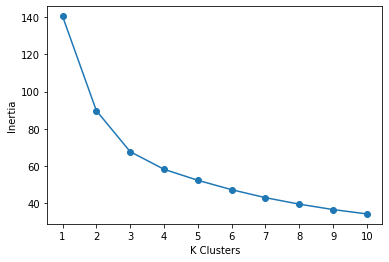

In [31]:
from sklearn.cluster import KMeans
## Elbow Method
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df2)
    ssd.append(model.inertia_)
plt.plot(k,ssd,marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)
    

3 is selected as optimal k value

In [32]:
model=KMeans(n_clusters=3)
model.fit(df2)

KMeans(n_clusters=3)

In [33]:
model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [34]:
df2['label']=model.labels_
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,0.770748,0.000000,0.545506,0.424853,0.008433,0.447468,0.016393,0.990830,0.001809,1
1,0.116758,0.231994,0.428181,0.483574,0.185165,0.208183,0.800937,0.058153,0.075276,0
2,0.211836,0.383930,0.157079,0.210601,0.248253,0.769416,0.808743,0.335495,0.082961,0
3,1.000000,0.733090,0.006721,0.393112,0.099560,1.000000,0.168618,1.000000,0.063644,1
4,0.060778,0.487655,0.368949,0.647040,0.379952,0.060745,0.820453,0.165511,0.243729,0
...,...,...,...,...,...,...,...,...,...,...
162,0.228719,0.503725,0.280100,0.548643,0.036897,0.117786,0.281811,0.471930,0.052013,0
163,0.121201,0.239299,0.241371,0.000000,0.324723,1.000000,0.765808,0.241557,0.270731,0
164,0.176293,0.874799,0.461214,0.985082,0.069609,0.576054,0.676034,0.125252,0.017533,0
165,0.469522,0.261213,0.272127,0.258213,0.069397,1.000000,0.457455,0.733617,0.017533,1


### Selecting Some important feature for data visualization

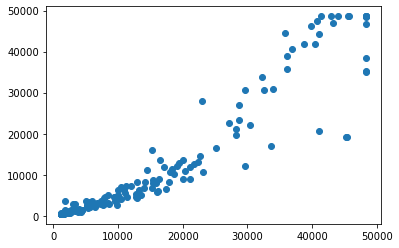

In [46]:
plt.scatter(df['income'],df['gdpp'])

In [37]:
df3=df[['income','gdpp']]

F:\Installed\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


([<matplotlib.axis.XTick at 0x1f3348a5250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

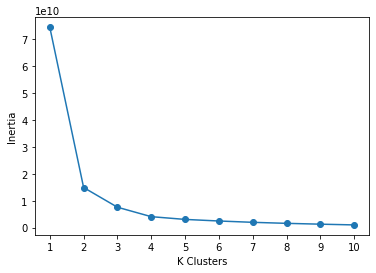

In [38]:
k=range(1,11)
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(df3)
    ssd.append(model.inertia_)
plt.plot(k,ssd,marker='o')
plt.xlabel('K Clusters')
plt.ylabel('Inertia')
plt.xticks(k)

4 is selected as optimal k value

In [39]:
model=KMeans(n_clusters=4)
model.fit(df3)

KMeans(n_clusters=4)

In [40]:
model.labels_

array([0, 0, 3, 0, 3, 3, 0, 1, 1, 3, 2, 2, 0, 3, 3, 1, 0, 0, 0, 0, 0, 3,
       3, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 2, 2,
       1, 3, 0, 0, 0, 2, 0, 3, 0, 1, 1, 3, 0, 0, 1, 0, 2, 3, 0, 0, 0, 0,
       0, 3, 1, 0, 0, 3, 3, 1, 2, 1, 0, 1, 0, 3, 0, 0, 1, 0, 0, 3, 3, 0,
       0, 2, 3, 1, 3, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 3, 0, 0, 0, 3, 2, 1, 3, 3, 0, 0, 2, 0, 3, 3,
       0, 1, 2, 2, 0, 3, 2, 2, 0, 3, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0, 0, 3,
       0, 0, 0, 1, 1, 1, 3, 0, 0, 3, 0, 0, 0])

In [43]:
centroid=model.cluster_centers_
centroid

array([[ 4359.96428571,  1957.51309524],
       [43467.08333333, 44570.41666667],
       [31947.05882353, 23217.64705882],
       [16157.61904762,  8947.61904762]])

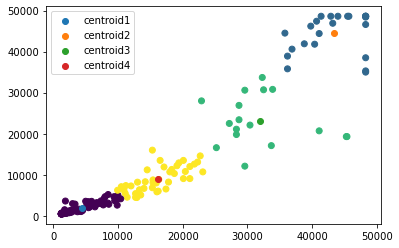

In [47]:
plt.scatter(df3.iloc[:,0],df3.iloc[:,1],c=model.labels_)
centroid=model.cluster_centers_
for i in range(len(centroid)):
    plt.scatter(centroid[i][0],centroid[i][1],label="centroid"+str(i+1))
plt.legend()